## La Regressione Polinomiale

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
np.set_printoptions(suppress=True)

In [2]:
X_train = np.array([[80], [150], [30], [50], [120], [60], [110], [110]])
y_train = np.array([16, 30, 12, 10, 24, 18, 20, 25])

#### Creiamo le features polinomiali

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
poly = PolynomialFeatures(2)
#poly = PolynomialFeatures(2, include_bias=False) # se vogliamo omettere la colonna bias
poly.fit(X_train)
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [10]:
X_train_poly = poly.transform(X_train)
X_train_poly

array([[    1.,    80.,  6400.],
       [    1.,   150., 22500.],
       [    1.,    30.,   900.],
       [    1.,    50.,  2500.],
       [    1.,   120., 14400.],
       [    1.,    60.,  3600.],
       [    1.,   110., 12100.],
       [    1.,   110., 12100.]])

#### Testiamo diverse regressioni polinomiali

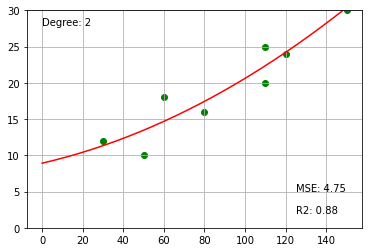

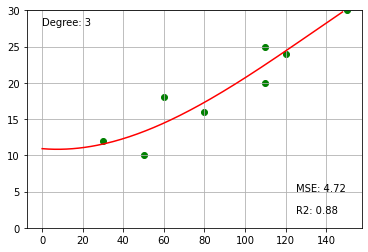

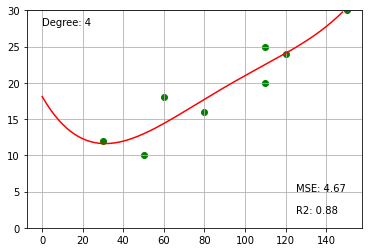

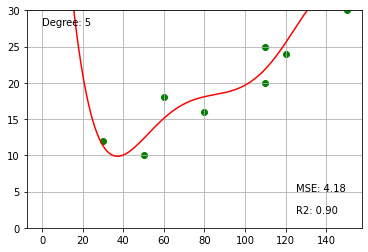

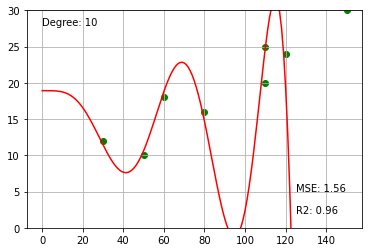

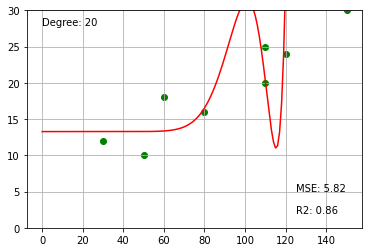

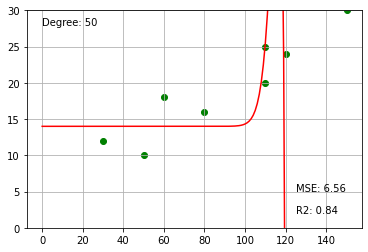

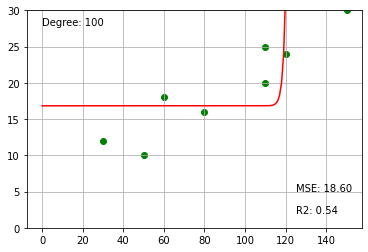

In [60]:
degrees = [2, 3, 4, 5, 10, 20, 50, 100] 

for d in degrees:
    
    poly = PolynomialFeatures(d)
    X_train_poly = poly.fit_transform(X_train)
    
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_pred = lr.predict(X_train_poly)

    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    X_line = np.arange(1, 150, 1).reshape(149, 1)
    X_line_poly = poly.transform(X_line)
    y_line = lr.predict(X_line_poly)

    ax = plt.gca()
    ax.set_ylim([0, 30])
    ax.grid()

    ax.scatter(X_train, y_train, c="green")
    ax.plot(y_line, c="red")
    
    ax.text(0, 28, f"Degree: {d}")
    ax.text(125, 5, f"MSE: {mse:.2f}")
    ax.text(125, 2, f"R2: {r2:.2f}")

    plt.show()


#### Regressione polinomiale multipla

In [61]:
X_train = np.array([[80, 1995], [150, 1995], [30, 2008], [50, 1996], 
                    [120, 1994], [60, 2006], [110, 1989], [110, 2000]])
y_train = np.array([16, 30, 12, 10, 24, 18, 20, 25])

In [65]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
print(poly.get_feature_names())
print(X_train_poly)

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
[[      1.      80.    1995.    6400.  159600. 3980025.]
 [      1.     150.    1995.   22500.  299250. 3980025.]
 [      1.      30.    2008.     900.   60240. 4032064.]
 [      1.      50.    1996.    2500.   99800. 3984016.]
 [      1.     120.    1994.   14400.  239280. 3976036.]
 [      1.      60.    2006.    3600.  120360. 4024036.]
 [      1.     110.    1989.   12100.  218790. 3956121.]
 [      1.     110.    2000.   12100.  220000. 4000000.]]


In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(f"MSE = {mean_squared_error(y_train, y_pred)}")
print(f"R2 = {r2_score(y_train, y_pred)}")

MSE = 0.17154887843424987
R2 = 0.9957362608855177
